In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import TimeSeriesSplit
from fbprophet import Prophet

In [2]:
df = pd.read_csv("zillow_data.csv")

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df.shape

(14723, 272)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [7]:
melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'RegionID'], var_name='time')

In [10]:
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)

In [11]:
melted = melted.dropna(subset=['value'])

In [12]:
melted['State'].value_counts()

CA    318744
NY    265015
TX    255096
PA    215451
FL    205265
OH    146313
IL    140587
NJ    133030
MI    124765
MA    110112
NC    110024
IN    107300
TN    106349
VA    103160
MN     94384
WA     89672
WI     87215
GA     85005
MD     83531
MO     76361
CO     65697
AZ     58775
OR     57350
OK     56938
SC     52436
NH     52171
KS     51500
AL     43896
LA     43523
IA     40640
KY     34234
CT     32860
UT     31230
ID     27363
AR     26721
MS     25837
NV     24826
ME     21659
NE     20172
WV     17730
MT     15638
RI     15635
HI     15011
NM     14553
DE      8630
AK      7420
WY      7092
DC      4770
ND      4526
SD      4252
VT      4240
Name: State, dtype: int64

In [13]:
group_by_state_time = melted.groupby(['State','time']).aggregate({'value':'mean'})

In [25]:
melted.groupby(['RegionName','time']).aggregate({'value':'mean'})

In [22]:
group_by_state_time[['State']]

KeyError: "None of [Index(['State'], dtype='object')] are in the [columns]"

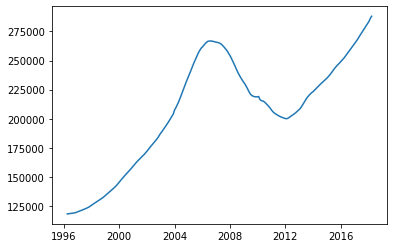

In [21]:
plt.plot(melted.groupby('time').aggregate({'value':'mean'}))

In [ ]:
df['RegionName'].nunique()

In [ ]:
df[:20].T

In [ ]:
df_transpose_header = df.T[:7]
df_transpose_header

In [ ]:
df_transpose_prices = df.T[7:]
df_transpose_prices.head()

In [ ]:
for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)

     #To get the indices 
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

tscv = TimeSeriesSplit(df_transpose_prices)

---

In [ ]:
df['CountyName'].value_counts()

In [ ]:
state_df = df.groupby(['State', 'CountyName'])

In [ ]:
only_oc_ca = state_df.get_group(('CA', 'Orange'))

In [ ]:
only_oc_ca_transpose = only_oc_ca.T[7:]

In [ ]:
only_oc_ca_transpose

In [ ]:
only_oc_ca_transpose['1996-04':'1997-01']

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(only_oc_ca_transpose);

In [ ]:
only_oc_ca_transpose.tail()

In [ ]:
model = ARIMA(np.asarray(only_oc_ca_transpose[96]), order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
model2 = ARIMA(np.asarray(only_oc_ca_transpose[96]), order=(1,1,2))
model2_fit = model2.fit(disp=0)
print(model2_fit.summary())

In [ ]:
residuals2 = pd.DataFrame(model2_fit.resid)
residuals2.plot()
plt.show()
residuals2.plot(kind='kde')
plt.show()
print(residuals2.describe())

In [ ]:
model3 = ARIMA(np.asarray(only_oc_ca_transpose[96][:9]), order=(0,1,1))
model3_fit = model3.fit(disp=0)
print(model3_fit.summary())

In [ ]:
model3_fit.predict() + only_oc_ca_transpose[96][0]

In [ ]:
plt.plot(only_oc_ca_transpose[96][:9]);
plt.plot(model3_fit.predict()+ only_oc_ca_transpose[96][0]);

---

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df[df['CountyName'] == 'Wabaunsee'].describe()

In [ ]:
df_transpose = df.T

In [ ]:
prices_only = df_transpose[7:]

In [ ]:
test = prices_only[1]
test.size

In [ ]:
pd.to_datetime(df_transpose[7:].index)

In [ ]:
df_datetime = pd.concat([pd.to_datetime(df_transpose[7:].index), df_transpose[7:]])

In [ ]:
df_datetime

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(test);